In [1]:
# Import libraries

import pandas as pd 
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) # to control the defaults of almost every property in Matplotlib

pd.options.mode.chained_assignment = None


In [2]:
# pandas for analyzing, cleaning, exploring, and manipulating data
# numpy for for working in domain of linear algebra, fourier transform, and matrices.
# seaborn for  uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions
# matplotlib for creating static, animated, and interactive visualizations in Python

In [3]:

# Now we need to read in the data

df = pd.read_csv("~/downloads/movies.csv")

In [4]:
# let's look at the data , bt default shows only first 5 rows
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Data formation

In [5]:
# let's see if there is any missing value 

# METHOD 1

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [12]:
# missing value in column budget , gross and rating

In [11]:
# METHOD 2 

df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
# METHOD 2.1

print(df[df['budget'].isnull()])

                  name     rating   genre  year  \
16                Fame          R   Drama  1980   
19          Stir Crazy          R  Comedy  1980   
24        Urban Cowboy         PG   Drama  1980   
25      Altered States          R  Horror  1980   
26     Little Darlings          R  Comedy  1980   
...                ...        ...     ...   ...   
7657              Leap        NaN   Drama  2020   
7659         I Am Fear  Not Rated  Horror  2020   
7660  Aloha Surf Hotel        NaN  Comedy  2020   
7664       Dream Round        NaN  Comedy  2020   
7667         Tee em el        NaN  Horror  2020   

                                released  score    votes            director  \
16          May 16, 1980 (United States)    6.6  21000.0         Alan Parker   
19     December 12, 1980 (United States)    6.8  26000.0      Sidney Poitier   
24          June 6, 1980 (United States)    6.4  14000.0       James Bridges   
25     December 25, 1980 (United States)    6.9  33000.0         Ke

In [9]:
# Converting datatypes - first fix all missing values

In [12]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [13]:
# replace the missing values by mean/median or mode for gross and budget

df['budget'] = df['budget'].fillna(df['budget'].mean())
df['gross'] = df['gross'].fillna(df['gross'].mean())


In [14]:
df.isna().sum()

name         0
rating      77
genre        0
year         0
released     2
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [15]:
# for removing all non-numeric values use to_numeric with parameter errors='coerce' - to replace non-numeric values to NaNs:
#df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
#df['gross'] = pd.to_numeric(df['gross'], errors='coerce')

In [16]:
# to remove all rows with NaNs in columns use dropna
#df = df.dropna(subset=['budget'])
#df = df.dropna(subset=['gross'])

In [17]:
df['budget'] = df['budget'].astype(int)
df['gross'] = df['gross'].astype(int)

In [18]:
# datatypes for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int32
gross         int32
company      object
runtime     float64
dtype: object

In [ ]:
# convert budget and gross values in millions

In [26]:
df['budget'] = (df['budget'].astype(float)/1000000) 


In [35]:
df['gross'] = (df['gross'].astype(float)/1000000)

In [24]:
# adding millions into column names
df.rename(columns={'budget':'budget(million)'}, inplace=True)
df.rename(columns={'gross':'gross(million)'}, inplace=True)


In [ ]:
#df.head()

In [46]:
# create correct year column
df['yearcorrect']= df['released'].astype(str).str[:4]

In [47]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget(millions),gross(millions),company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19.0,46.998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.5,58.853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18.0,538.375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.5,83.453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.0,39.846344,Orion Pictures,98.0,July


In [50]:
# sort values by gross 
# inplace = True is used, it performs operation on data and nothing is returned. 
# inplace = False is used, it performs operation on data and returns a new copy of data.Aug 8, 2019
df = df.sort_values(by =['gross(millions)'], inplace = False, ascending = False)

In [52]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget(millions),gross(millions),company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245.0,2069.521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321.0,2048.359754,Marvel Studios,149.0,Apri
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260.0,1670.727580,Walt Disney Pictures,118.0,July
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150.0,1670.516444,Universal Pictures,124.0,June
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220.0,1518.815515,Marvel Studios,143.0,May


In [80]:
# to see all of the data 
# the None statement to remove default which shows only 20 valus . 
pd.set_option('display.max_rows',None)  

In [82]:
# df.sort_values(by =['gross'], inplace = False, ascending = False)
# by this code we will get all of the data

In [53]:
# to see for duplicates / to drop duplicates by particular column

df.duplicated()
df['company']=df['company'].drop_duplicates().sort_values(ascending =False)

In [87]:
# to drop all the  duplicates from data
# df.drop_duplicates()

# finding correlation in the  data

In [ ]:
# Types of correlation - 1. univariate - find relationship individually 
# 2. bivariate - corerelation b/w TWO variables
# 3. multivariate - correlation among variables


In [88]:
# BIVARITE ANALYSIS-
# budget high correlation - spent money α profit
# company high correlation - big companies makes more money

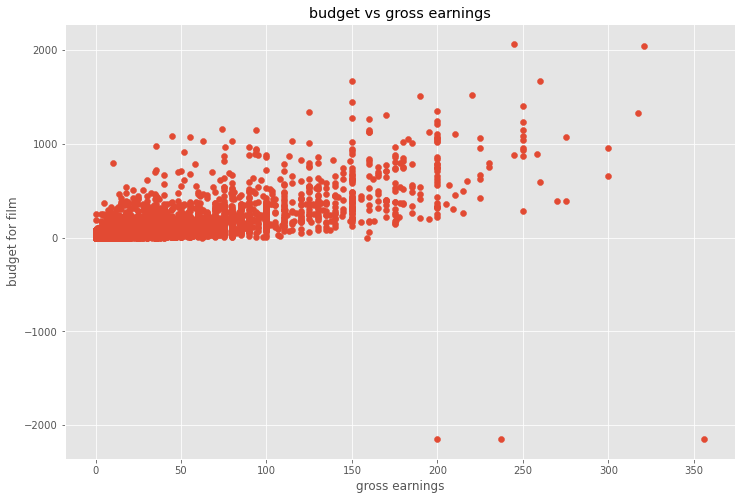

In [56]:
# scatter plot with budget vs gross

plt.scatter(x= df['budget(millions)'], y = df['gross(millions)'])

plt.title('budget vs gross earnings')

plt.xlabel('gross earnings')

plt.ylabel('budget for film')

plt.show()


<AxesSubplot:xlabel='budget', ylabel='gross'>

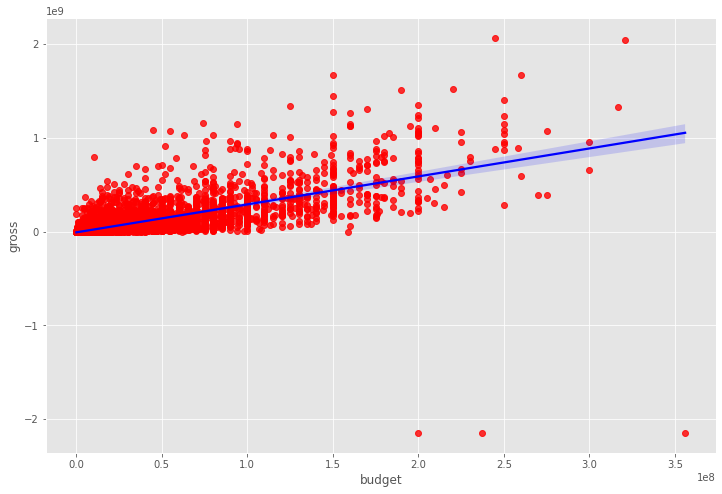

In [98]:
#  reg / regression plot -  budget vs gross using seaborn lib

sns.regplot(x= 'budget',y = 'gross', data = df, scatter_kws={'color':'red'},line_kws={'color':'blue'})

# scatter_kws={'color':'red'},line_kws={'color':'blue'}) for the color or look nicer


In [ ]:
# here budget and  gross are positively correlated meansnthat companies who spending more are making more profit 

In [57]:
# let's start looking at correlation among  varibles

df.corr()  # only for numeric varibles

,year,score,votes,budget(millions),gross(millions),runtime
year,1.000000,0.097995,0.222945,0.265578,0.246315,0.120811
score,0.097995,1.000000,0.409182,0.064554,0.165776,0.399451
votes,0.222945,0.409182,1.000000,0.421090,0.569499,0.309212
budget(millions),0.265578,0.064554,0.421090,1.000000,0.643677,0.265305
gross(millions),0.246315,0.165776,0.569499,0.643677,1.000000,0.200099
runtime,0.120811,0.399451,0.309212,0.265305,0.200099,1.000000


In [100]:
df.corr() # default 
df.corr(method ='pearson') # to be used as a default for numeric/continuous variables
# df.corr(method ='kendall') 
# df.corr(method ='spearman')  for discrete variables

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.267580,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.200726,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.550848,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.669421,0.318595
gross,0.267580,0.200726,0.550848,0.669421,1.000000,0.223576
runtime,0.074203,0.414580,0.352437,0.318595,0.223576,1.000000


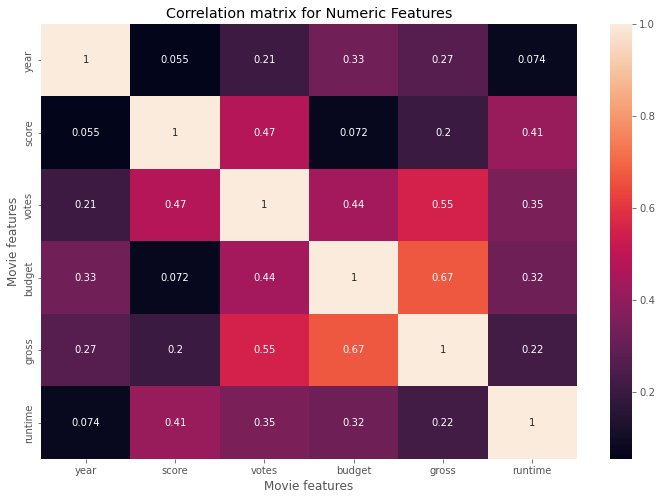

In [102]:
# high correlation Between budget and gross using correlation metrix

correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
# look at company
#df.head()
#df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
#df_numerized

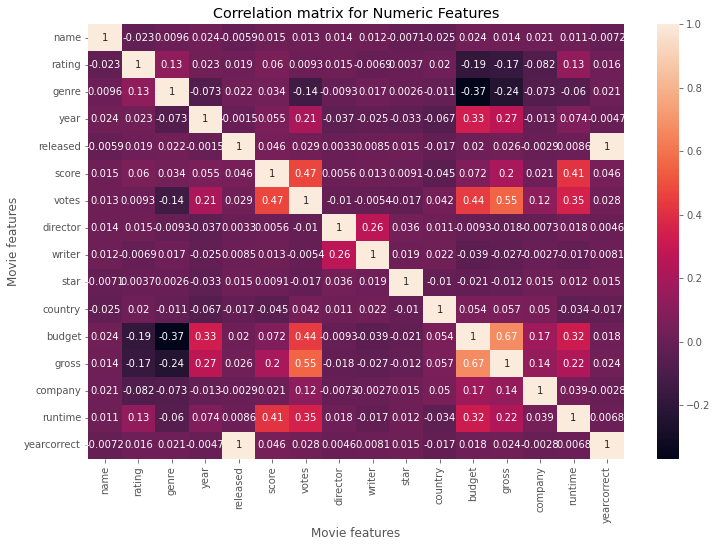

In [108]:
# high correlation Between budget and gross

correlation_matrix = df_numerized.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [109]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.023013,0.009617,0.024435,-0.005896,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.024555,0.023698,0.014389,0.021209,0.010800,-0.007216
rating,-0.023013,1.000000,0.128102,0.022668,0.018836,0.059550,0.009255,0.014847,-0.006923,0.003737,0.020148,-0.186892,-0.167889,-0.082189,0.133239,0.016205
genre,0.009617,0.128102,1.000000,-0.073026,0.021712,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.238905,-0.073293,-0.060186,0.021016
year,0.024435,0.022668,-0.073026,1.000000,-0.001481,0.055174,0.205758,-0.036936,-0.024568,-0.032770,-0.066662,0.327781,0.267580,-0.013062,0.074203,-0.004720
released,-0.005896,0.018836,0.021712,-0.001481,1.000000,0.046424,0.029029,0.003341,0.008514,0.015363,-0.017231,0.019888,0.025728,-0.002927,0.008619,0.996190
score,0.014955,0.059550,0.034061,0.055174,0.046424,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.200726,0.021054,0.414580,0.045603
votes,0.012915,0.009255,-0.136457,0.205758,0.029029,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.550848,0.119366,0.352437,0.027719
director,0.013699,0.014847,-0.009303,-0.036936,0.003341,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.017647,-0.007337,0.018082,0.004565
writer,0.011602,-0.006923,0.017500,-0.024568,0.008514,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.026778,-0.002658,-0.016672,0.008114
star,-0.007109,0.003737,0.002619,-0.032770,0.015363,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.011816,0.015086,0.012439,0.014537


In [111]:
# to see highest correlation quickly 
# method called unstacking

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.023013
             genre          0.009617
             year           0.024435
             released      -0.005896
             score          0.014955
             votes          0.012915
             director       0.013699
             writer         0.011602
             star          -0.007109
             country       -0.024555
             budget         0.023698
             gross          0.014389
             company        0.021209
             runtime        0.010800
             yearcorrect   -0.007216
rating       name          -0.023013
             rating         1.000000
             genre          0.128102
             year           0.022668
             released       0.018836
             score          0.059550
             votes          0.009255
             director       0.014847
             writer        -0.006923
             star           0.003737
             country        0.020148
 

In [112]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.368900
genre        budget        -0.368900
gross        genre         -0.238905
genre        gross         -0.238905
rating       budget        -0.186892
budget       rating        -0.186892
rating       gross         -0.167889
gross        rating        -0.167889
votes        genre         -0.136457
genre        votes         -0.136457
rating       company       -0.082189
company      rating        -0.082189
genre        company       -0.073293
company      genre         -0.073293
year         genre         -0.073026
genre        year          -0.073026
country      year          -0.066662
year         country       -0.066662
genre        runtime       -0.060186
runtime      genre         -0.060186
score        country       -0.044690
country      score         -0.044690
writer       budget        -0.039420
budget       writer        -0.039420
year         director      -0.036936
director     year          -0.036936
runtime      country       -0.033554
c

In [113]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

votes        gross          0.550848
gross        votes          0.550848
             budget         0.669421
budget       gross          0.669421
yearcorrect  released       0.996190
released     yearcorrect    0.996190
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64


In [ ]:
# by looking at the correlation data , it's clear that the highest correlation in between votes and gross . but intially we preditaed to have a high correlayion in gross And company which turned out as a false assumption.

In [ ]:
#df.head(5)

In [116]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
1432    54773202654
1403    51241105418
454     42356430218
1114    40021704691
1429    35833650748
1388    30198712540
1048    19628786232
552     11873612858
553     11593807697
1373    10664679494
987     10120607435
1005     8937010092
1315     8318570396
1140     7886344526
684      7243673721
Name: gross, dtype: int64

C:\Users\AutoLogon\AppData\Local\Temp\ipykernel_4436\3446864086.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  top_10_companies = df.groupby(by = 'company').max()[['gross(million','year']].sort_values(by=['gross(million'],ascending = False).reset_index()


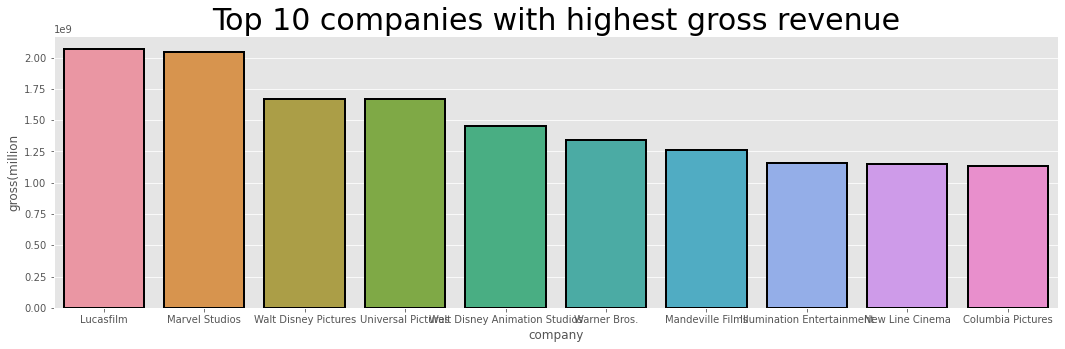

In [31]:
top_10_companies = df.groupby(by = 'company').max()[['gross(million','year']].sort_values(by=['gross(million'],ascending = False).reset_index()

fig = plt.figure(figsize=(18,5))

plt.title("Top 10 companies with highest gross revenue",size = 30)

ax= sns.barplot(data=top_10_companies.iloc[:10],y= "gross(million",x= "company",linewidth = 2,edgecolor = "black")

plt.xlabel("company")

plt.show()

In [ ]:
# here we have top companies visual with highest gross which are lucasfilm , marvel studios , walt disney pictures etc.